In [1]:
import os
# from pywavesurfer import ws
import matlab.engine
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
import seaborn as sns
from scipy.optimize import curve_fit
from termcolor import colored

In [2]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys'
date = 'test'
newData = os.path.join(dataPath,date)
os.path.exists(newData)

False

In [4]:
eng = matlab.engine.start_matlab()
file = dataPath+'/test/untitled_0001.h5'
data = eng.ws.loadDataFile(file)
data.keys()
# mp = np.array(data['sweep_%s' %os.path.basename(file).split('.')[0].split('_')[1]]['analogScans'])[:,0]

dict_keys(['header', 'sweep_0001'])

In [5]:
data = data['sweep_0001']['analogScans']

In [6]:
data = np.array(data)

In [7]:
data.shape

(20000, 2)

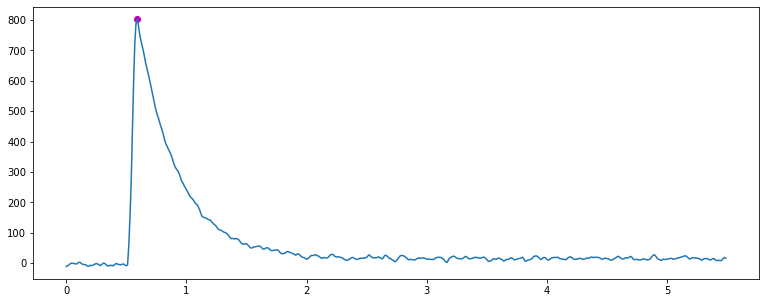

In [9]:
data_s = -data[:,0][1950:2500]
peaks,_ = ss.find_peaks(data_s,height=600)
x = np.arange(data_s.shape[0])/1e2
plt.figure(figsize=[13,5])
plt.plot(x,data_s)
plt.scatter(peaks[0]/1e2,data_s[peaks],color='m')

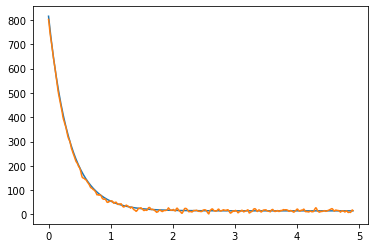

In [11]:
curve = data_s[peaks[0]:]
x = np.arange(curve.shape[0])/100.0
plt.plot(x,800*np.exp(-3*x)+15)
plt.plot(x,curve)

In [12]:
p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x,curve,p0=[800,-3,15])

In [138]:
curve_t = curve - np.mean(curve[400:])
hf = (curve_t[0]-np.mean(curve[400:]))*0.368
hf_idx = np.argmin(np.abs(curve_t-hf))

In [139]:
1/curve[hf_idx]

0.0033070920045689986

In [140]:
p[1]
# curve.shape

-3.0660456837482797

In [75]:
# x = x[p[0]:]
np.mean(data[:50])

2.9353561552308753

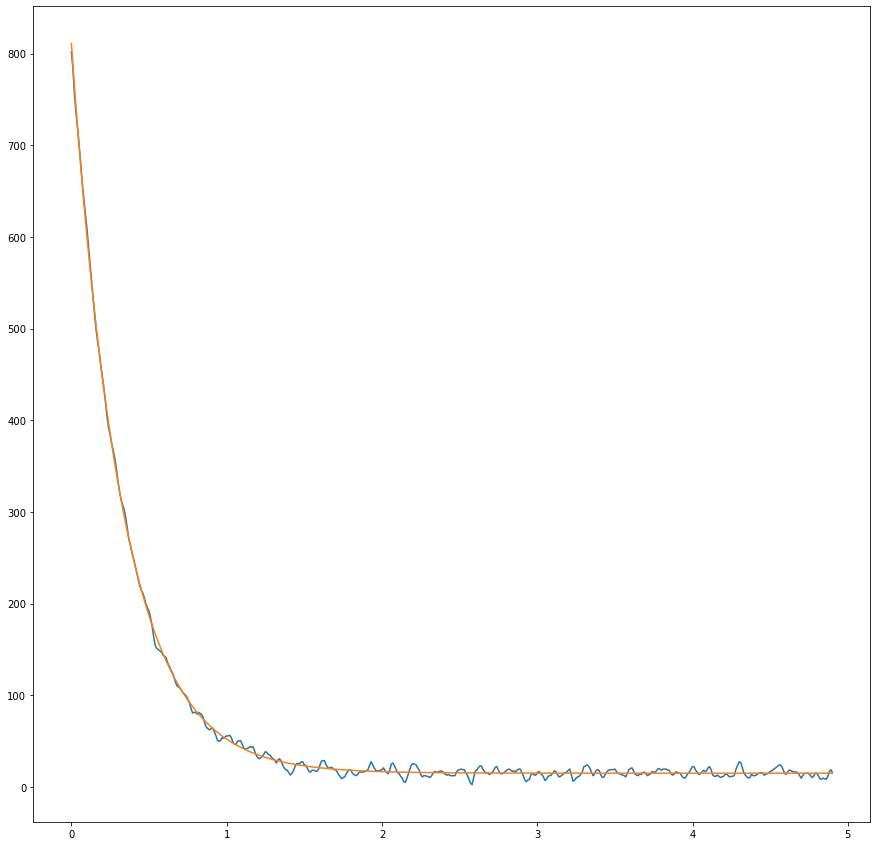

In [115]:
plt.figure(figsize=[15,15])
plt.plot(x,curve)
plt.plot(x,p[0]*np.exp(p[1]*x)+p[2])
# plt.plot(x,-20*np.exp(p[1]*x)+15)
# plt.ylim([-10,50])
# plt.xlim([0,0.002])

In [63]:
p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,[0,0.002,0.004],[-5.03113017817763,20*0.37-5,15])
p

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 10.68351451, 264.00942834, -15.71464468])

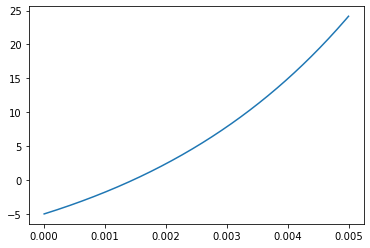

In [70]:
x = np.arange(500)/1e5
# y = -np.exp(-3066.04574062*x)+14.93053834
plt.plot(x,p[0]*np.exp(p[1]*x)+p[2])
# plt.plot(x,y)

In [69]:
# tau = 1/p[1]
y

In [58]:
tau

-0.00032615299463830316

In [ ]:
plt.plot(data_s)

In [ ]:
np.mean(data_s[-10:])-np.mean(data_s[:10])

In [ ]:
10/15.461901785735167

In [ ]:
plt.plot(data[:,0])

In [54]:
np.mean(data[:,0][500:1500])

5.03113017817763

In [55]:
np.mean(data[:,0][6000:8000])

-15.059472856166408

In [ ]:
5.03113017817763+15.059472856166408

In [ ]:
10/20.09060303434404

In [ ]:
p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,[0,50,100],[5,,20])